<a href="https://colab.research.google.com/github/renzo1836/PRE_ENTREGA_DS2/blob/main/PREENTREGA_VALDEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Abstracto con motivación y audiencia**

El dataset con el que trabajaremos ha sido extraído de Kaggle, su autor es Royce Kimmons, y puede ser consultado en el siguiente enlace: [Students Exam Scores: Extended Dataset](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores). En principio, los datos con los trabajamos son ficticios, sin embargo es útil para poner en práctica herramientas de ciencia de datos y modelos predictivos. Este dataset reúne las calificaciones de estudiantes y algunos *features* socioeconómicos, de los padres o de los propios estudiantes. Nuestra intención es analizar el impacto de tales *features* en el rendimiento académico de los estudiantes e intentar predecir sus calificaciones.

¿Por qué es importante trabajar con datos de sobre el rendimiento académico de los estudiantes? Más allá de que los datos con los que trabajamos son ficticios, nos permite acercarnos al desarrollo de modelos predictivos en materia educativa. Si primero trabajamos con datos ficticios, una vez que tengamos datos reales, podremos ampliar nuestro conocimiento del impacto real de algunas variables en las calificaciones de los estudiantes, y así para poder llevar adelante políticas públicas en mejora de la educación de nuestros estudiantes.

Por tal razón, esta *notebook* está dirigida a personas interesadas en tener aproximaciones al análisis de datos educativos e interesados en políticas públicas, quienes puedan utilizar los modelos desarrollados, o algunas de las conclusiones a las que llegamos. Pero, además, está dirigido a toda persona que esté iniciándose en el mundo de la ciencia de datos, pues en esta *notebook* encontrará diversas estrategias que puedan ser de su utilidad: desde el trabajo con datos faltante, hasta modelos predicitivos, pasando por el diseño de visualizaciones y generación de tablas bivariadas.

A continuación, cargamos el dataset desde Drive:

In [4]:
df = pd.read_csv('/content/drive/MyDrive/CSVs Coder/Expanded_data_with_more_features.csv') #Leemos el archivo CSV desde Drive
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


**Preguntas e hipótesis que queremos responder**

Al tratarse de un análisis aún en fase exploratoria, trabajaremos con un análisis bivariado por el momento. Intentaremos describir e identificar si el grupo étnico y el género de los estudiantes tienen un impacto en las notas de los estudiantes. Nuestras preguntas son:

1.   ¿Existe variación en las puntuaciones de los estudiantes seún el grupo étnico?
2.   ¿Existe variación en las puntuaciones de los estudiantes según el género?
Lista de preguntas que se busca responder mediante el análisis de datos

Nuestra hipótesis en la primerapregunta es que sí existen variaciones según grupo étnico, y que los varones logran tener mejores calificaciones en general.

Para responder estas preguntas, realizaremos gráficos que nos ayudarán a hacer un análisis bivariado para cada pregunta.

**Resumen de metadata**

Al descargar el dataset, se proporcionan dos archivos: el primero cuenta con más de 30mil filas, tiene menos *features*, y no tiene datos faltantes; mientras que el segundo, cuenta con la misma cantidad de filas, tiene más *features* y cuenta con datos faltantes. En este oportunidad, trabajaremos con el segundo dataset, pues la presencia de datos faltantes, ayuda a poner en práctica algunas estrategias de imputación de nulos y limpieza de datos. Además, el tener una mayor cantidad de casos (filas) le da una ventaja en comparación a otros datasets reales, pero que cuentan con menos filas o menos *features*, lo que en algunos casos dificulta el trabajo con modelos predicitivos.

Las variables con las que trabajamos son:

1.   **Gender**: Género de los estudiantes. Categorías: *male* o *female*.
2.   **EthnicGroup**: Grupo étnico de los estudiantes. Categorías anónimas: del *group A*, al *group E*.
3.   **ParentEduc**: Nivel educativo de los padres. Categorías: desde *some_highschool* (secundario) hasta *master's degree* (maestría)
4.   **LunchType**: Tipo de almuerzo escolar. Categorías: *standard* (estándar) o *free/reduced* (gratuito/reducido).
5.   **TestPrep**: Si completó o no el curso de preparación para exámenes. Categorías: *completed* (completado) o *none* (no completado).
6.   **ParentMaritalStatus**: Estado civil de los padres. Categorías: *married* (casados), *single* (solteros), *widowed* (viudo), *divorced* (divorciado).
7.   **PracticeSport**: Con cuánta frecuencia el estudiante practica deportes. Categorías: *never* (nunca), *sometimes* (a veces), *regularly* (regularmente).
8.   **IsFirstChild**: Si el estudiante es el primogénito. Categorías: *yes* (sí) o *no* (no).
9.   **NrSiblings**: Cantidad de hermanos que tiene el estudiante. Categorías: Del 0 al 7.
10.  **TransportMeans**: Medios de transporte para ir a la escuela. Categorías: *schoolbus* (bus escolar), *private* (medio de transporte privado).
11.  **WklyStudyHours**: Horas semanales de estudio. Categorías: *less that 5hrs* (menos de cinco horas), *between 5 and 10hrs* (entre cinco y diez horas) y *more than 10hrs* (más de diez horas).
12.  **MathScore**: Puntación alcanzada en Matemáticas. Categorías: 0-100.
13.  **ReadingScore**: Puntación alcanzada en Lectura. Categorías: 0-100.
14.  **WritingScore**: Puntación alcanzada en Escritura. Categorías: 0-100.

En el siguiente cuadro de código, identificamos las columnas (*features*/variables), la presencia de nulos y el tipo de variables. Podemos ver que contamos con 30641 filas y una gran cantidad de variables *object*.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


Como vimos en el cuadro de código anterior, tenemos una fuerte presencia de nulos en varias filas, pero no en todas las filas. Para saber la cantidad de los nulos, ejecutamos lo siguiente:

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


Ahora, habiendo identiifcado los nulos, procedemos a imputarlos. La decisión que hemos tomado es eliminar todas las filas que contengan nulos.

<Axes: >

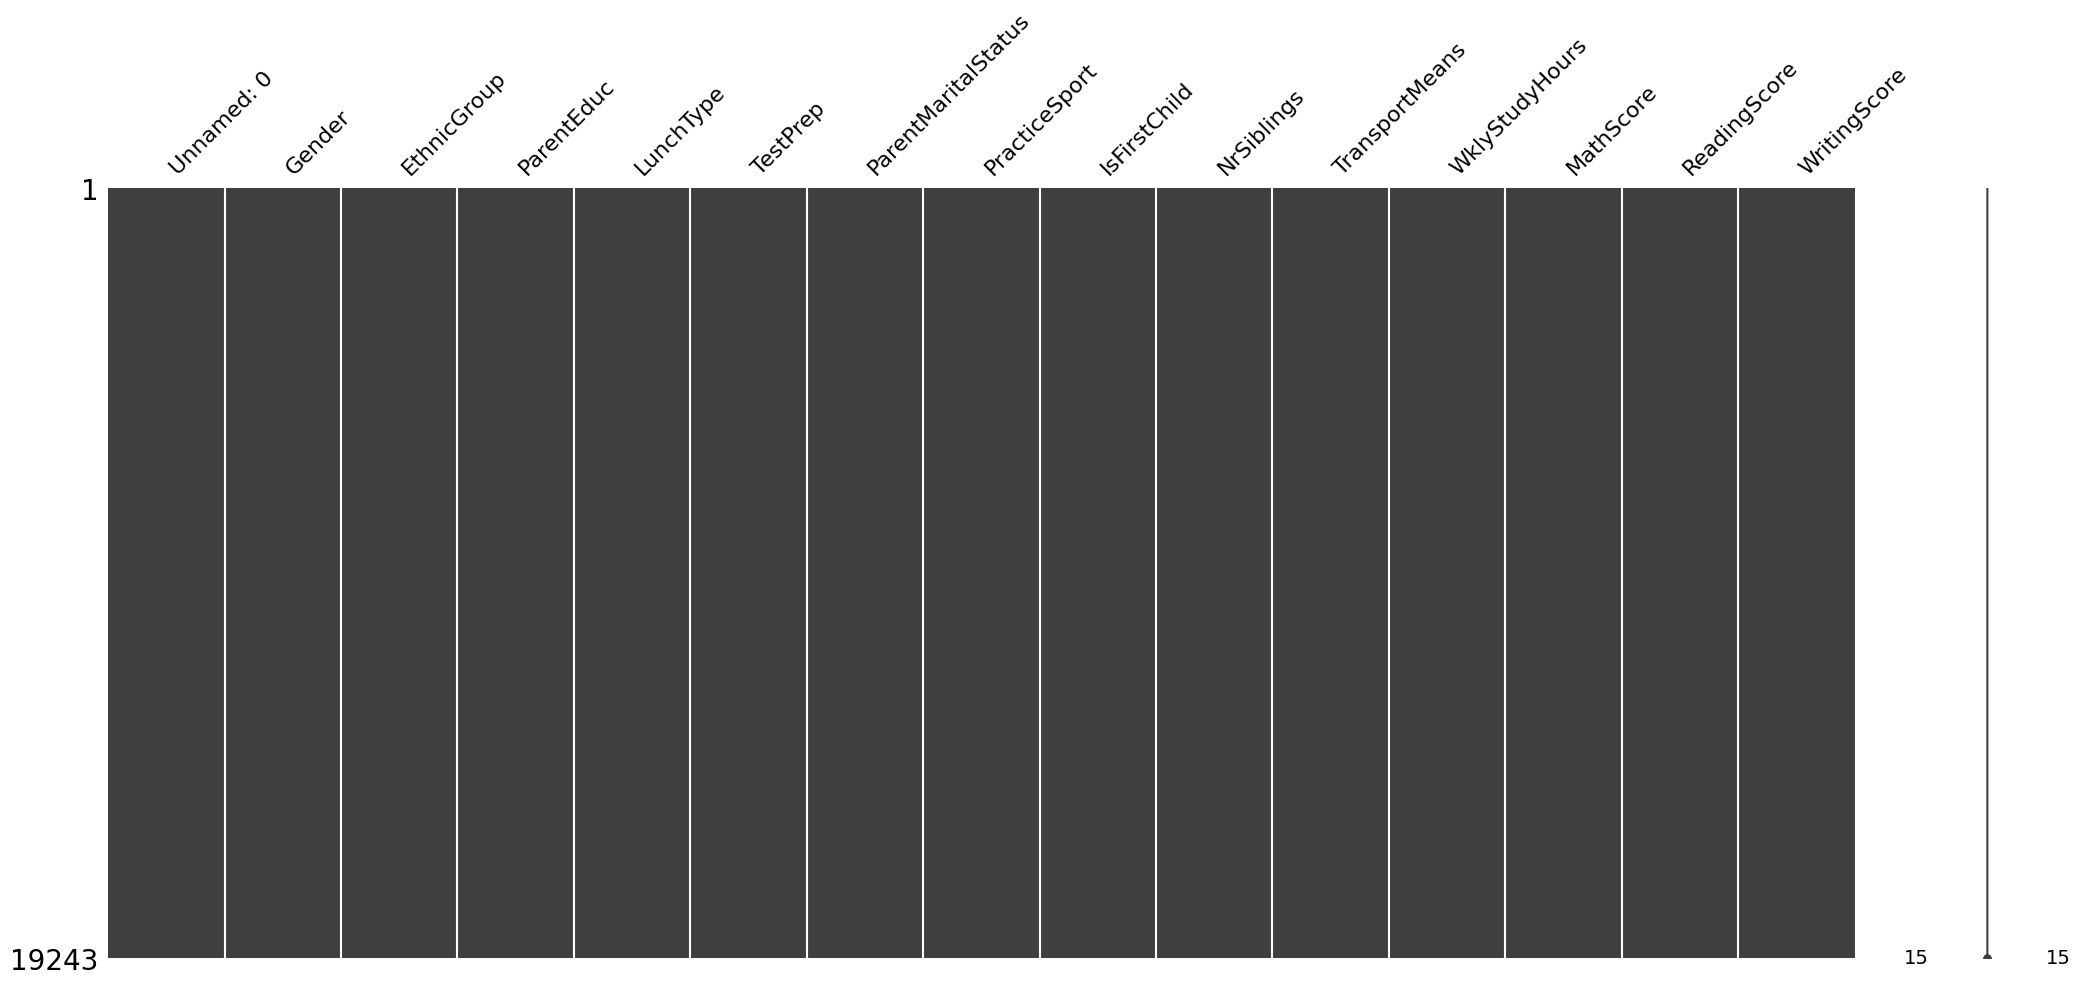

In [7]:
df = df.dropna() #Código para eliminar nulos

#Generamos el siguiente código para comprobar que todos los datos están completos y no hay valores ni filas vacías
import missingno as msno
%matplotlib inline
msno.matrix(df)

**Visualizaciones ejecutivas que responden nuestras preguntas**

Habiendo eliminado los datos nulos del dataset original, procedemos a generar nuestras primeras visualizaciones. Comencemos analizando las calificaciones de los estudiantes por grupo étnico:

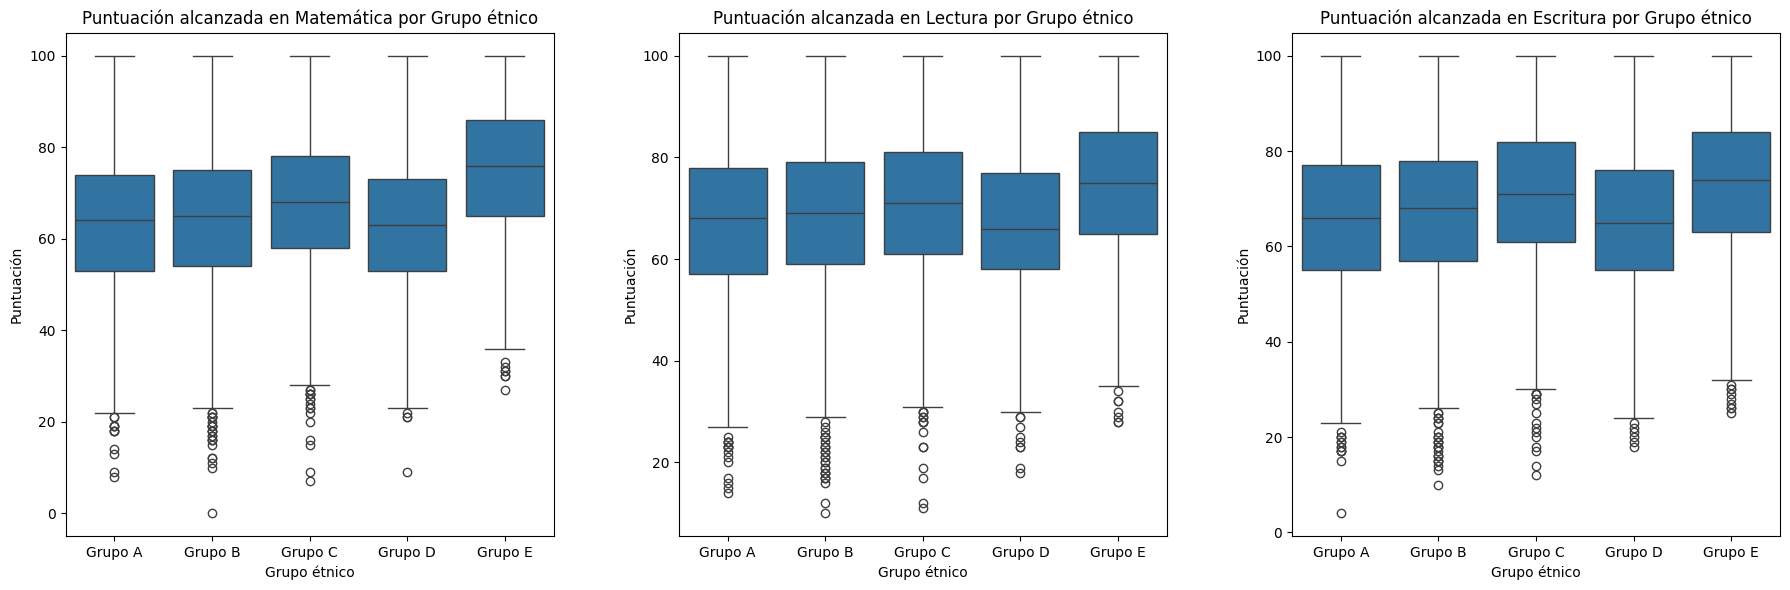

In [23]:
#Hacemos un gráfico de cajas y bigotes para cada Materia
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6)) #Aumentamos el tamaño de la figura

plt.subplot(1, 3, 1)
sns.boxplot(x='EthnicGroup', y='MathScore', data=df)
plt.title('Puntuación alcanzada en Matemática por Grupo étnico')
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']) #Modificamos las etiquetas del eje x
plt.xlabel('Grupo étnico')
plt.ylabel('Puntuación')

plt.subplot(1, 3, 2)
sns.boxplot(x='EthnicGroup', y='ReadingScore', data=df)
plt.title('Puntuación alcanzada en Lectura por Grupo étnico')
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']) #Modificamos las etiquetas del eje x
plt.xlabel('Grupo étnico')
plt.ylabel('Puntuación')

plt.subplot(1, 3, 3)
sns.boxplot(x='EthnicGroup', y='WritingScore', data=df)
plt.title('Puntuación alcanzada en Escritura por Grupo étnico')
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']) #Modificamos las etiquetas del eje x
plt.xlabel('Grupo étnico')
plt.ylabel('Puntuación')

plt.tight_layout(w_pad=5) #Agregamos espacio horizontal entre los subplots
plt.show()

Tal como podemos observar, los grupos presentan niveles de dispersión parecidos.Pero es el Grupo E el que se destaca con mejores calificaciones para cada materia. Para poder tener una aproximación a esto, generamos una tabla en la que mostramos los promedios y el desvío estándar de las calificiaciones por materia, según grupo étnico:

In [24]:
tabla_etnico = df.groupby('EthnicGroup')[['MathScore', 'ReadingScore', 'WritingScore']].agg(['mean', 'std']).round(2)

tabla_etnico.index = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']
tabla_etnico.columns = ['Promedio en Matemáticas', 'Desvío estándar en Matemáticas',
                        'Promedio en Lectura', 'Desvío estándar en Lectura',
                        'Promedio en Escritura', 'Desvío estándar en Escritura']

def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold; color: green' if v else '' for v in is_max]

tabla_etnico.style.apply(highlight_max, axis=0).format(precision=2, na_rep='')

,Promedio en Matemáticas,Desvío estándar en Matemáticas,Promedio en Lectura,Desvío estándar en Lectura,Promedio en Escritura,Desvío estándar en Escritura
Grupo A,63.09,14.98,66.72,14.79,65.09,15.41
Grupo B,63.57,15.12,67.34,14.87,65.98,15.57
Grupo C,64.67,15.01,68.58,14.73,67.18,15.35
Grupo D,67.82,14.88,70.61,14.56,71.14,15.21
Grupo E,75.27,14.08,74.44,13.85,72.89,14.50


Según la tabla mostrada, los mayores pormedios los tiene el Grupo E. Y los desvíos estándar más altos (aunque solo ligeramente más altos que los otros grupos), los tiene el grupo B. Para visualizar mejor lo de los promedio, generamos un gráfico de lineas:

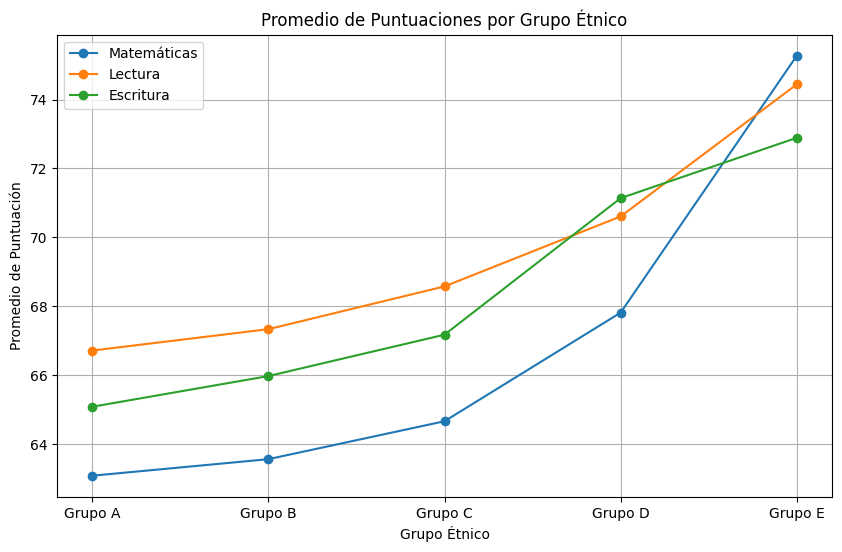

In [25]:
#hacemos un gráfico de líneas, utilizando los datos de la tabla anterior
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(tabla_etnico.index, tabla_etnico['Promedio en Matemáticas'], marker='o', label='Matemáticas')
plt.plot(tabla_etnico.index, tabla_etnico['Promedio en Lectura'], marker='o', label='Lectura')
plt.plot(tabla_etnico.index, tabla_etnico['Promedio en Escritura'], marker='o', label='Escritura')
plt.xlabel('Grupo Étnico')
plt.ylabel('Promedio de Puntuación')
plt.title('Promedio de Puntuaciones por Grupo Étnico')
plt.legend()
plt.grid(True)
plt.show()


Este gráfico de líneas nor permite saber en qué materia se destaca cada grupo étnico. El Grupo A destaca más en Lectura, al igual que los grupos B y C. Por otro lado, el grupo D se destaca en Escritura, mientras que el E sobresale en Matemáticas.

Habiendo analizado las calificaciones según el grupo étnico, veamos las claificaciones según género

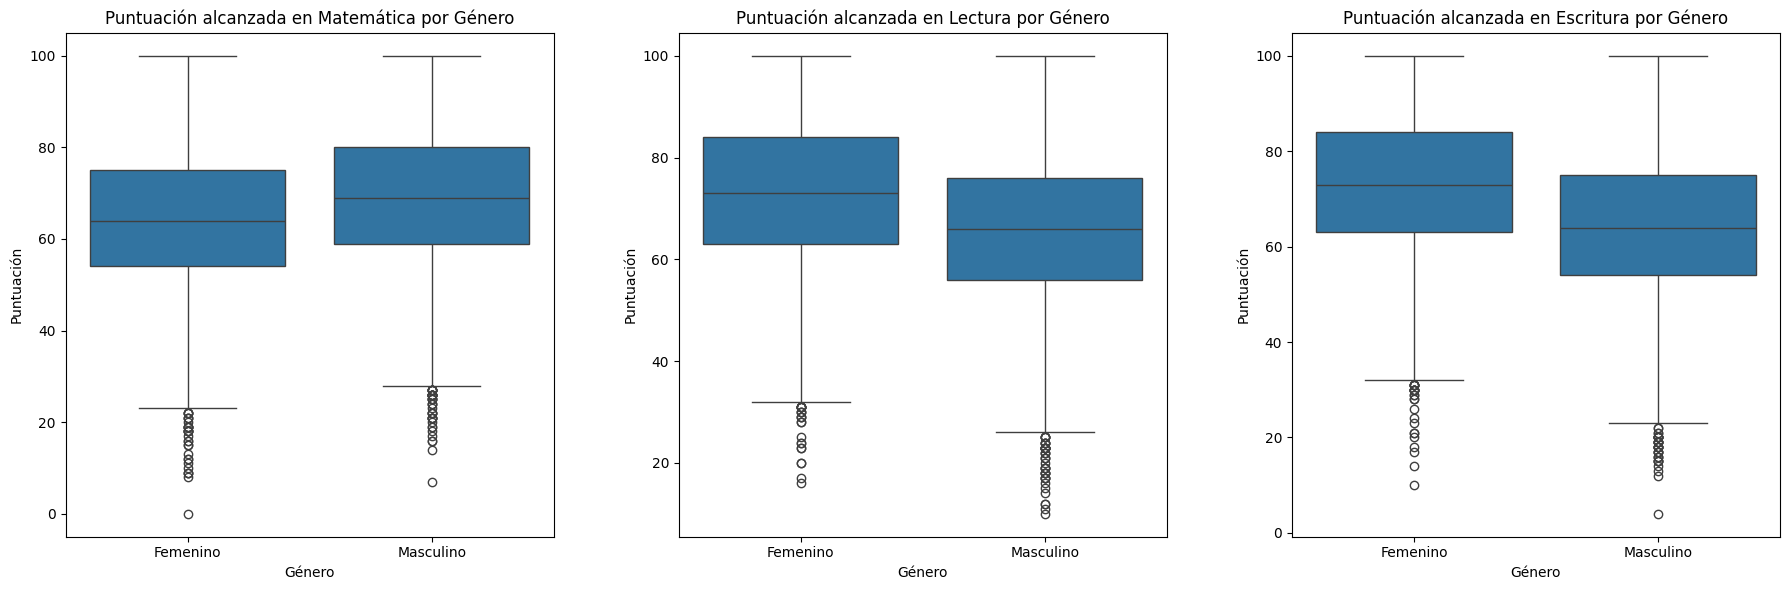

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6)) #Aumentamos el tamaño de la figura

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='MathScore', data=df)
plt.title('Puntuación alcanzada en Matemática por Género')
plt.xlabel('Género')
plt.ylabel('Puntuación')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='ReadingScore', data=df)
plt.title('Puntuación alcanzada en Lectura por Género')
plt.xlabel('Género')
plt.ylabel('Puntuación')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='WritingScore', data=df)
plt.title('Puntuación alcanzada en Escritura por Género')
plt.xlabel('Género')
plt.ylabel('Puntuación')

plt.tight_layout(w_pad=5) #Agregamos espacio horizontal entre los subplots
plt.show()

En principio, podemos ver una variación, aunque no significativa, en la calificicación de los estudiantes según el género. Para el caso de los varones, presentan mejores notas en matemáticas, mientras que las mujeres logran alcanzar mejores resultados en Lectura y Escritura.

**Insights**

En un primer momento, nos habíamos propuesto responder a dos preguntas:
1. ¿Existe variación en las puntuaciones de los estudiantes seún el grupo étnico?
2. ¿Existe variación en las puntuaciones de los estudiantes según el género?

Gracias a las visualizaciones, hemos podido ver si las notas varias según estas dos variables. En principio, el Grupo E no solo presenta mejores calificacione que el resto de grupos étnicos, sino que, además, se destaca en Matemáticas. Por otro lado, los varones se destacan en Matemáticas, mientras que las mujeres presentan notas más altas en Lectura y Escritura.